In [14]:
# convnext でベクトル化して、ベクトル検索をやる
import tensorflow as tf

In [24]:
base_model = tf.keras.applications.convnext.ConvNeXtBase(
    weights='imagenet',
    include_top=False,
    pooling="avg"
)

In [25]:
base_model.summary()

Model: "convnext_base"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 convnext_base_prestem_normaliz  (None, None, None,   0          ['input_3[0][0]']                
 ation (Normalization)          3)                                                                
                                                                                                  
 convnext_base_stem (Sequential  (None, None, None,   6528       ['convnext_base_prestem_normaliza
 )                              128)                             tion[0][0]']         

 tf.__operators__.add_74 (TFOpL  (None, None, None,   0          ['tf.__operators__.add_73[0][0]',
 ambda)                         128)                              'convnext_base_stage_0_block_2_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_base_downsampling_blo  (None, None, None,   131584     ['tf.__operators__.add_74[0][0]']
 ck_0 (Sequential)              256)                                                              
                                                                                                  
 convnext_base_stage_1_block_0_  (None, None, None,   12800      ['convnext_base_downsampling_bloc
 depthwise_conv (Conv2D)        256)                             k_0[0][0]']                      
                                                                                                  
 convnext_

 convnext_base_downsampling_blo  (None, None, None,   525312     ['tf.__operators__.add_77[0][0]']
 ck_1 (Sequential)              512)                                                              
                                                                                                  
 convnext_base_stage_2_block_0_  (None, None, None,   25600      ['convnext_base_downsampling_bloc
 depthwise_conv (Conv2D)        512)                             k_1[0][0]']                      
                                                                                                  
 convnext_base_stage_2_block_0_  (None, None, None,   1024       ['convnext_base_stage_2_block_0_d
 layernorm (LayerNormalization)  512)                            epthwise_conv[0][0]']            
                                                                                                  
 convnext_base_stage_2_block_0_  (None, None, None,   1050624    ['convnext_base_stage_2_block_0_l
 pointwise

 layernorm (LayerNormalization)  512)                            epthwise_conv[0][0]']            
                                                                                                  
 convnext_base_stage_2_block_3_  (None, None, None,   1050624    ['convnext_base_stage_2_block_3_l
 pointwise_conv_1 (Dense)       2048)                            ayernorm[0][0]']                 
                                                                                                  
 convnext_base_stage_2_block_3_  (None, None, None,   0          ['convnext_base_stage_2_block_3_p
 gelu (Activation)              2048)                            ointwise_conv_1[0][0]']          
                                                                                                  
 convnext_base_stage_2_block_3_  (None, None, None,   1049088    ['convnext_base_stage_2_block_3_g
 pointwise_conv_2 (Dense)       512)                             elu[0][0]']                      
          

 convnext_base_stage_2_block_6_  (None, None, None,   1049088    ['convnext_base_stage_2_block_6_g
 pointwise_conv_2 (Dense)       512)                             elu[0][0]']                      
                                                                                                  
 convnext_base_stage_2_block_6_  (None, None, None,   512        ['convnext_base_stage_2_block_6_p
 layer_scale (LayerScale)       512)                             ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_base_stage_2_block_6_  (None, None, None,   0          ['convnext_base_stage_2_block_6_l
 identity (Activation)          512)                             ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_84 (TFOpL  (None, None, None,   0          ['tf.__operators__.add_83[0][0]',
 ambda)   

                                                                                                  
 tf.__operators__.add_87 (TFOpL  (None, None, None,   0          ['tf.__operators__.add_86[0][0]',
 ambda)                         512)                              'convnext_base_stage_2_block_9_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_base_stage_2_block_10  (None, None, None,   25600      ['tf.__operators__.add_87[0][0]']
 _depthwise_conv (Conv2D)       512)                                                              
                                                                                                  
 convnext_base_stage_2_block_10  (None, None, None,   1024       ['convnext_base_stage_2_block_10_
 _layernorm (LayerNormalization  512)                            depthwise_conv[0][0]']           
 )        

 convnext_base_stage_2_block_13  (None, None, None,   25600      ['tf.__operators__.add_90[0][0]']
 _depthwise_conv (Conv2D)       512)                                                              
                                                                                                  
 convnext_base_stage_2_block_13  (None, None, None,   1024       ['convnext_base_stage_2_block_13_
 _layernorm (LayerNormalization  512)                            depthwise_conv[0][0]']           
 )                                                                                                
                                                                                                  
 convnext_base_stage_2_block_13  (None, None, None,   1050624    ['convnext_base_stage_2_block_13_
 _pointwise_conv_1 (Dense)      2048)                            layernorm[0][0]']                
                                                                                                  
 convnext_

 )                                                                                                
                                                                                                  
 convnext_base_stage_2_block_16  (None, None, None,   1050624    ['convnext_base_stage_2_block_16_
 _pointwise_conv_1 (Dense)      2048)                            layernorm[0][0]']                
                                                                                                  
 convnext_base_stage_2_block_16  (None, None, None,   0          ['convnext_base_stage_2_block_16_
 _gelu (Activation)             2048)                            pointwise_conv_1[0][0]']         
                                                                                                  
 convnext_base_stage_2_block_16  (None, None, None,   1049088    ['convnext_base_stage_2_block_16_
 _pointwise_conv_2 (Dense)      512)                             gelu[0][0]']                     
          

 convnext_base_stage_2_block_19  (None, None, None,   0          ['convnext_base_stage_2_block_19_
 _gelu (Activation)             2048)                            pointwise_conv_1[0][0]']         
                                                                                                  
 convnext_base_stage_2_block_19  (None, None, None,   1049088    ['convnext_base_stage_2_block_19_
 _pointwise_conv_2 (Dense)      512)                             gelu[0][0]']                     
                                                                                                  
 convnext_base_stage_2_block_19  (None, None, None,   512        ['convnext_base_stage_2_block_19_
 _layer_scale (LayerScale)      512)                             pointwise_conv_2[0][0]']         
                                                                                                  
 convnext_base_stage_2_block_19  (None, None, None,   0          ['convnext_base_stage_2_block_19_
 _identity

                                                                                                  
 convnext_base_stage_2_block_22  (None, None, None,   512        ['convnext_base_stage_2_block_22_
 _layer_scale (LayerScale)      512)                             pointwise_conv_2[0][0]']         
                                                                                                  
 convnext_base_stage_2_block_22  (None, None, None,   0          ['convnext_base_stage_2_block_22_
 _identity (Activation)         512)                             layer_scale[0][0]']              
                                                                                                  
 tf.__operators__.add_100 (TFOp  (None, None, None,   0          ['tf.__operators__.add_99[0][0]',
 Lambda)                        512)                              'convnext_base_stage_2_block_22_
                                                                 identity[0][0]']                 
          

 _identity (Activation)         512)                             layer_scale[0][0]']              
                                                                                                  
 tf.__operators__.add_103 (TFOp  (None, None, None,   0          ['tf.__operators__.add_102[0][0]'
 Lambda)                        512)                             , 'convnext_base_stage_2_block_25
                                                                 _identity[0][0]']                
                                                                                                  
 convnext_base_stage_2_block_26  (None, None, None,   25600      ['tf.__operators__.add_103[0][0]'
 _depthwise_conv (Conv2D)       512)                             ]                                
                                                                                                  
 convnext_base_stage_2_block_26  (None, None, None,   1024       ['convnext_base_stage_2_block_26_
 _layernor

 Lambda)                        1024)                            , 'convnext_base_stage_3_block_1_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_base_stage_3_block_2_  (None, None, None,   51200      ['tf.__operators__.add_106[0][0]'
 depthwise_conv (Conv2D)        1024)                            ]                                
                                                                                                  
 convnext_base_stage_3_block_2_  (None, None, None,   2048       ['convnext_base_stage_3_block_2_d
 layernorm (LayerNormalization)  1024)                           epthwise_conv[0][0]']            
                                                                                                  
 convnext_base_stage_3_block_2_  (None, None, None,   4198400    ['convnext_base_stage_3_block_2_l
 pointwise

In [ ]:
from PIL import Image
def load_image_with_white(path):
    img = Image.open(path)

    # 白背景を追加する
    width, height = img.size
    bg_color = (255, 255, 255) # 背景色を白に設定
    max_dim = max(width, height)
    new_img = Image.new('RGB', (max_dim, max_dim), bg_color)
    new_img.paste(img, ((max_dim - width) // 2, (max_dim - height) // 2))

    # リサイズする
    new_img = new_img.resize((224, 224))

    # numpy配列に変換する
    new_img_array = np.array(new_img)
    return new_img_array

In [66]:
# get pokemon image embeddings
import glob
from tqdm.auto import tqdm
from tensorflow.keras.preprocessing import image

vectors = {}
pokemon_images = glob.glob("../template_images/labeled_pokemon_templates2/*.jpg")
for path in tqdm(pokemon_images):
    img = load_image_with_white(path)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.convnext.preprocess_input(img)
    _vector = base_model.predict(img)
    vectors[path.split("/")[-1].split(".")[0]] = _vector

  0%|          | 0/562 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


In [67]:
vector_array = np.array(list(vectors.values()))
vector_array = np.reshape(vector_array, (len(vector_array), _vector.shape[1]))

In [68]:
vector_array.shape

(562, 1024)

In [69]:
import numpy as np
import faiss

faiss_index = faiss.IndexFlatL2(_vector.shape[1])
faiss_index.add(vector_array)

vector_index = list(vectors.keys())

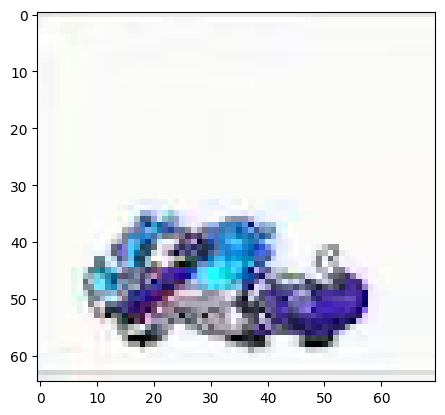

In [2]:
# 検索してみる
# 対象画像
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("../template_images/labeled_pokemon_templates/ラウドボーン.png")
plt.imshow(img)
plt.show()

In [73]:
import re

img = load_image_with_white("../template_images/labeled_pokemon_templates/ラウドボーン.png")
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.convnext.preprocess_input(img)

_test_image_1_vector = base_model.predict(img)
_, indexes = faiss_index.search(_test_image_1_vector, 10)
[pokemon_no_to_japanese_dict[int(re.sub( r'\D', '', vector_index[v]))] for v in indexes[0]]

1/1 [==============================] - 1s 1s/step


['メテノ',
 'ブロロローム',
 'アノクサ',
 'タギングル',
 'クワッス',
 'クマシュン',
 'アサナン',
 'サーフゴー',
 'ロトム',
 'ゴチム']

In [83]:
scores = {}
for key, vector in vectors.items():
    _score = np.reshape(_test_image_1_vector, (1024)).dot(np.reshape(vector, (1024)))
    scores[key] = _score

In [84]:
{k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

{'0965': 12.220467,
 '0994': 22.314915,
 '0964': 31.253738,
 '0823': 55.30746,
 '0384': 57.602448,
 '0435': 59.685326,
 '0483': 60.60818,
 '0953': 62.410923,
 '0713': 62.682465,
 '0128C': 64.31211,
 '0128A': 65.227325,
 '0197': 67.37109,
 '0950': 68.0504,
 '0663': 69.34628,
 '0757': 69.97433,
 '0503': 74.040886,
 '0571': 74.609604,
 '0229': 76.697495,
 '1007': 77.99575,
 '0383': 79.55615,
 '0641A': 80.708755,
 '0123': 81.19017,
 '0705A': 81.538895,
 '0778': 84.10725,
 '0973': 84.31706,
 '0189': 86.51409,
 '0861': 87.66261,
 '0434': 87.874344,
 '0437': 88.09613,
 '0128B': 88.250656,
 '0874': 88.436584,
 '0610': 88.83343,
 '0055': 88.96757,
 '0196': 91.03726,
 '0302': 91.788025,
 '0248': 92.71183,
 '0897': 92.72619,
 '0612': 93.24193,
 '0890': 96.64365,
 '0951': 96.65083,
 '0493': 97.33137,
 '0633': 98.28195,
 '0130': 99.022156,
 '0713A': 100.10506,
 '0904': 100.669556,
 '0232': 101.227135,
 '0839': 101.29971,
 '0847': 101.376526,
 '0362': 101.81006,
 '0217': 102.64854,
 '0706A': 102.773

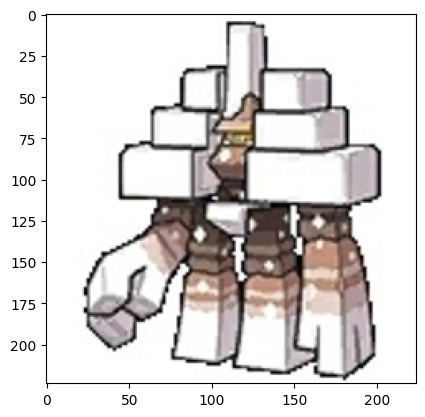

In [86]:
img = load_image_with_white("../template_images/labeled_pokemon_templates2/0965.jpg")
plt.imshow(img)
plt.show()